# -999999を最頻値の2で置き換えることの妥当性を検証

In [14]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use("Agg") #Needed to save figures
%matplotlib inline

from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import roc_auc_score

training = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

print(training.shape)
print(test.shape)

X = training.iloc[:,:-1]
y = training.TARGET

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn. model_selection import train_test_split

#目的変数と関連性の高い上位220個
selectK = SelectKBest(f_classif, k=220)
selectK.fit(X, y)
#選択した特徴量の列のみ取得
X_sel = selectK.transform(X)

#選択した特徴量名を取得
features = X.columns[selectK.get_support()]
print (features)

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=1301)

(76020, 370)
(75818, 369)


C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 21  22  56  57  58  59  80  84  85 131 132 133 134 155 161 162 179 180
 189 192 220 222 234 238 244 248 261 262 303 307 315 319 327 349] are constant.
  UserWarning)
C:\Users\Kei\anaconda3\envs\py_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['var3', 'var15', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3',
       'imp_op_var40_comer_ult1', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var13_largo_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=220)


In [15]:
features[0]

'var3'

In [16]:
training['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

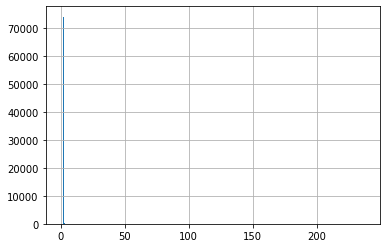

In [17]:
training.loc[training['var3'] != -999999, 'var3'].hist(bins=1000)

- 目的変数　var3(var3 != -999999)
- 説明変数　var3以外の特徴量(var3 != -999999)

k近傍法で学習させて、var3 == -999999をもつデータのvar3を予測する。


In [18]:
#var3 != -999999 の行のvar3以外の特徴量
X_train = training.loc[training['var3'] != -999999, features[1:]]
#var3 != -999999 の行のvar3
y_train = training.loc[training['var3'] != -999999, 'var3']
#var3 == -999999 の行のvar3以外の特徴量
X_test = training.loc[training['var3'] == -999999, features[1:]]

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [21]:
y_test = clf.predict(X_test)
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

-999999を最頻値の2で置き換えることはおそらく良いアプローチだといえる。

In [22]:
# Check in what columns value -999999 appears
print ([f for f in X.columns if X[f][X[f] == -999999].shape[0] > 0])

['var3']


In [23]:
#Replace value -999999 in column var3
X.var3 = X.var3.replace(-999999,2)